In [1]:
#Loding the required libraries and setting the float frmat globally
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Reading Company Data File & rounds2 Data file
Path = "F:/Upgrad/Investment_Funds/"
companies = pd.read_csv(Path+"companies.txt",sep="\t",encoding="ISO-8859-1")
rounds2 = pd.read_csv(Path+"rounds2.csv",encoding="ISO-8859-1")

In [3]:
companies.shape

(66368, 10)

In [4]:
rounds2.shape

(114949, 6)

In [5]:
#How many unique companies are present in rounds2?
rounds2["company_permalink"].nunique()

90247

In [6]:
#How many unique companies are present in the companies file?
companies["permalink"].nunique()


66368

In [7]:
#Unique Key in the companies
for i in range(0,companies.shape[1]):
    if companies.shape[0] == companies.iloc[:,i].nunique():
        print (companies.columns[i])
        break
    else:
        pass

permalink


In [8]:
#Converting the Company permalink to upper case in both the dataframes
rounds2["company_permalink"]=rounds2["company_permalink"].str.upper()
companies["permalink"] = companies["permalink"].str.upper()

In [9]:
#Finding the companies whcih are present in rounds2 dataframe and missing in company dataframe
rounds2[~rounds2["company_permalink"].isin(companies["permalink"])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [10]:
#Renameing the permalink column name in companies  to match with company permalink in rounds2 data frame
companies = companies.rename(columns = {"permalink":"company_permalink"})

In [11]:
#Merging the rounds2 and companies dataframes
master_frame = pd.merge(rounds2,companies,how = 'left',on ='company_permalink' )

In [12]:
#Finding the no.of observations in master frame
master_frame.shape

(114949, 15)

In [13]:
#Checking the first few rows in the master dataframe
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [14]:
master_frame = master_frame.infer_objects()
master_frame.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

In [15]:
#Finding the percentage of missing values in each column of master_frame
round((100*master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

In [16]:
#Dropping the columns funding_round_code and founded_at as there are many nulls and not much useful for analysis
master_frame = master_frame.drop(["funding_round_code","founded_at"],axis = 1)
round((100*master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

In [17]:
#Removing the rows where the raised_amount_usd is null
master_frame = master_frame[~master_frame["raised_amount_usd"].isnull()]
round((100*master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              4.56
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

In [18]:
#Removing the rows where the country_code is null
master_frame = master_frame[~master_frame["country_code"].isnull()]
round((100*master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              3.79
category_list             0.65
status                    0.00
country_code              0.00
state_code                1.97
region                    1.34
city                      1.34
dtype: float64

In [19]:
#Removing the rows where the category list is null
master_frame = master_frame[~master_frame["category_list"].isnull()]
round((100*master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              3.67
category_list             0.00
status                    0.00
country_code              0.00
state_code                1.96
region                    1.34
city                      1.33
dtype: float64

In [20]:
#Imputing the homepage_url from the name of the company
master_frame.loc[(master_frame["homepage_url"].isnull()),"homepage_url"] = "http://" + master_frame.loc[(master_frame["homepage_url"].isnull()),"name"] + "/"
round((100*master_frame.isnull().sum())/len(master_frame.index),2)
#Other missing values will be treated after identifying the top three countries

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              0.00
category_list             0.00
status                    0.00
country_code              0.00
state_code                1.96
region                    1.34
city                      1.33
dtype: float64

In [21]:
#Understanding the details of raised_amount_usd
master_frame["raised_amount_usd"].describe()

count         88529.00
mean       10473849.72
std       111811808.00
min               0.00
25%          370518.00
50%         1800000.00
75%         7100000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

In [22]:
#Finding the Average funds for each funding type
fund_type_grouped = pd.DataFrame(master_frame.groupby("funding_round_type")["raised_amount_usd"].mean().reset_index()).sort_values(by = "raised_amount_usd",ascending = False)
print(fund_type_grouped)

       funding_round_type  raised_amount_usd
6           post_ipo_debt       169451789.77
10       secondary_market        84438532.25
8          private_equity        73938486.28
7         post_ipo_equity        66077058.57
2          debt_financing        17167653.47
12            undisclosed        15891661.39
13                venture        11724222.69
4                   grant         4512698.29
9    product_crowdfunding         1353226.91
1        convertible_note         1337186.65
0                   angel          971573.89
11                   seed          747793.68
3     equity_crowdfunding          509897.97
5   non_equity_assistance          480753.38


In [23]:
#Finding the Total Amount of investment in angel,private_equity,seed,venture
fund_type_amount = pd.DataFrame(master_frame.loc[master_frame["funding_round_type"].isin(["venture","angel","seed","private_equity"])].groupby("funding_round_type")["raised_amount_usd"].sum().reset_index())
fund_type_amount

,funding_round_type,raised_amount_usd
0,angel,4274925121.00
1,private_equity,134568045021.00
2,seed,15774707732.00
3,venture,560523362596.00


In [24]:
#Finding the total number of investments in funding type angel,venture and private equity
fund_type_count = pd.DataFrame(master_frame.loc[master_frame["funding_round_type"].isin(["venture","angel","seed","private_equity"])].groupby("funding_round_type")["company_permalink"].size().reset_index())
fund_type_count.sort_values(by="company_permalink",ascending=False)

,funding_round_type,company_permalink
3,venture,47809
2,seed,21095
0,angel,4400
1,private_equity,1820


In [25]:
#Count of investmets for each Funding Type
pd.DataFrame(master_frame.groupby("funding_round_type")["company_permalink"].size().reset_index()).sort_values(by="company_permalink",ascending = False)

,funding_round_type,company_permalink
13,venture,47809
11,seed,21095
2,debt_financing,6506
0,angel,4400
4,grant,1939
8,private_equity,1820
12,undisclosed,1345
1,convertible_note,1320
3,equity_crowdfunding,1128
7,post_ipo_equity,598


In [26]:
#Finding investment type which is having raised amount greater than 5 million and less than 15 million
upper_limit = 15000000
lower_limit = 5000000
fund_type = fund_type_grouped.loc[(fund_type_grouped["raised_amount_usd"] >= lower_limit)  & (fund_type_grouped["raised_amount_usd"] <= upper_limit) ]
fund_type

,funding_round_type,raised_amount_usd
13,venture,11724222.69


In [27]:
#Storing only Venture data in a different data frame master_frame_ven
master_frame_ven =  master_frame.loc[master_frame["funding_round_type"] ==fund_type.iloc[0,0]]
master_frame_ven.shape

(47809, 13)

In [28]:
#No of investments in each country for the funding type Venture
master_frame_ven.groupby('country_code')['company_permalink'].size().sort_values(ascending = False).reset_index()

,country_code,company_permalink
0,USA,35943
1,GBR,2041
2,CHN,1548
3,CAN,1246
4,FRA,912
5,IND,819
6,ISR,786
7,DEU,554
8,ESP,316
9,SWE,273


In [29]:
#Finding the top 9 countries having highest investment amount
top9= master_frame_ven.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False).reset_index().head(9)
#top9 = top9.to_frame()
top9

,country_code,raised_amount_usd
0,USA,420068029342.00
1,CHN,39338918773.00
2,GBR,20072813004.00
3,IND,14261508718.00
4,CAN,9482217668.00
5,FRA,7226851352.00
6,ISR,6854350477.00
7,DEU,6306921981.00
8,JPN,3167647127.00


In [30]:
#Creating a list of  English speaking country codes from Wiki
countries =['Europe',	'Oceania',	'Caribbean',	'ATG',	'AUS',	'BHS',	'BRB',	'BLZ',	'North America',	'BWA',	'Caribbean',	'BDI',	'CMR',	'CAN',	'Caribbean',	'COK',	'Caribbean',	'DMA',	'SWZ',	'South Atlantic',	'FJI',	'GMB',	'GHA',	'Europe',	'GRD',	'Oceania',	'Europe',	'GUY',	'Asia',	'IND',	'IRL',	'Europe',	'JAM',	'Europe',	'KEN',	'KIR',	'LSO',	'LBR',	'MWI',	'MLT',	'MHL',	'MUS',	'FSM',	'Caribbean',	'NAM',	'NRU',	'NZL',	'NGA',	'NIU',	'Australia',	'Oceania',	'PAK',	'PLW',	'PNG',	'PHL',	'Oceania',	'Caribbean',	'Oceania',	'RWA',	'South Atlantic',	'KNA',	'LCA',	'VCT',	'WSM',	'SYC',	'SLE',	'SGP',	'Caribbean',	'SLB',	'SOM',	'ZAF',	'SSD',	'SDN',	'TZA',	'TON',	'TTO',	'Caribbean',	'TUV',	'Caribbean',	'UGA',	'GBR',	'USA',	'VUT',	'ZMB',	'ZWE',	'Indian Ocean',
]
countries = pd.DataFrame(countries)
countries.columns = ['code']
countries.shape
countries.head()

,code
0,Europe
1,Oceania
2,Caribbean
3,ATG
4,AUS


In [31]:
#Finding the top 3 countries haivng highest investment
top_three = top9.loc[top9["country_code"].isin(countries['code'])].head(3)
print(top_three)

  country_code  raised_amount_usd
0          USA    420068029342.00
2          GBR     20072813004.00
3          IND     14261508718.00


In [32]:
#Creating a data frame with three most investment-friendly countries and the most suited funding type 
master_frame_type_coun = master_frame_ven.loc[master_frame_ven["country_code"].isin(top_three["country_code"])].copy()
master_frame_type_coun.shape

(38803, 13)

In [33]:
#Count of companies for the top three countries
master_frame_type_coun.groupby("country_code").size()

country_code
GBR     2041
IND      819
USA    35943
dtype: int64

In [34]:
#Treating missing values in the final data frame
master_frame_type_coun.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
name                         0
homepage_url                 0
category_list                0
status                       0
country_code                 0
state_code                  72
region                     156
city                       156
dtype: int64

In [35]:
#Finding frequent state code in each country and imputing the null state code column
c1_st = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[0,0]].groupby("state_code")["state_code"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c2_st = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[1,0]].groupby("state_code")["state_code"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c3_st = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[2,0]].groupby("state_code")["state_code"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
master_frame_type_coun.loc[(master_frame_type_coun["state_code"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[0,0] ),"state_code"]=c1_st.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["state_code"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[1,0] ),"state_code"]=c2_st.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["state_code"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[2,0] ),"state_code"]=c3_st.iloc[0,0]
master_frame_type_coun.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
name                         0
homepage_url                 0
category_list                0
status                       0
country_code                 0
state_code                   0
region                     156
city                       156
dtype: int64

In [36]:
#Finding frequent city in each country and imputing the null city column
c1_city = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[0,0]].groupby("city")["city"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c2_city = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[1,0]].groupby("city")["city"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c3_city = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[2,0]].groupby("city")["city"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
master_frame_type_coun.loc[(master_frame_type_coun["city"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[0,0] ),"city"]=c1_city.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["city"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[1,0] ),"city"]=c2_city.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["city"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[2,0] ),"city"]=c3_city.iloc[0,0]
master_frame_type_coun.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_usd            0
name                         0
homepage_url                 0
category_list                0
status                       0
country_code                 0
state_code                   0
region                     156
city                         0
dtype: int64

In [37]:
#Finding frequent region in each country and imputing the null region column
c1_region = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[0,0]].groupby("region")["region"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c2_region = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[1,0]].groupby("region")["region"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
c3_region = pd.DataFrame(master_frame_type_coun.loc[master_frame_type_coun["country_code"]==top_three.iloc[2,0]].groupby("region")["region"].size().reset_index(name = 'counts').sort_values(by = 'counts',ascending = False).head(1))
master_frame_type_coun.loc[(master_frame_type_coun["region"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[0,0] ),"region"]=c1_region.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["region"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[1,0] ),"region"]=c2_region.iloc[0,0]
master_frame_type_coun.loc[(master_frame_type_coun["region"].isnull()) & (master_frame_type_coun["country_code"]==top_three.iloc[2,0] ),"region"]=c3_region.iloc[0,0]
master_frame_type_coun.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
dtype: int64

In [38]:
#Splitting the Category list column based on first value in category list and having this value in new column called category
master_frame_type_coun = master_frame_type_coun.rename(columns = {"category_list":"category_list_old"})
master_frame_type_coun["category_list"] = master_frame_type_coun['category_list_old'].str.split('|').str[0]
master_frame_type_coun.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_old,status,country_code,state_code,region,city,category_list
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps


In [39]:
#Importing the mapping file
mapping = pd.read_csv(Path+"mapping.csv")
mapping.columns = ["category_list","Automotive & Sports","Blanks","Cleantech / Semiconductors","Entertainment","Health","Manufacturing","News, Search and Messaging","Others","Social, Finance, Analytics, Advertising"]

In [40]:
#Replacing 0 in the Category List column of mapping with na
mapping["category_list"] = mapping["category_list"].str.replace('0','na')
#Making sure that all zeros are replaced with na in Category list of mapping
mapping["category_list"] = mapping["category_list"].str.replace("Enterprise 2.na",'Enterprise 2.0')


In [41]:
#Adding a new column category in the mapping data frame with sector name
mapping["category"] = pd.get_dummies(mapping).idxmax(1)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",category
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [42]:
#Creating a mapping dataframe having only 2 columns with categories
mapping_01 = mapping.loc[:,['category_list','category']]
mapping_01['category_list'] = mapping_01['category_list'].str.upper()
mapping_01.head()

,category_list,category
0,NaN,Blanks
1,3D,Manufacturing
2,3D PRINTING,Manufacturing
3,3D TECHNOLOGY,Manufacturing
4,ACCOUNTING,"Social, Finance, Analytics, Advertising"


In [43]:
#Adding the main sector column to the data frame
master_frame_type_coun["category_list"] = master_frame_type_coun["category_list"].str.upper()
master_frame_type_coun = pd.merge(master_frame_type_coun,mapping_01,how = 'left',on="category_list")
#master_frame_type_coun = master_frame_type_coun.drop(["category_list"],axis = 1)
master_frame_type_coun.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_old,status,country_code,state_code,region,city,category_list,category
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,MEDIA,Entertainment
1,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising"
2,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising"
3,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,APPS,"News, Search and Messaging"


In [44]:
#Finding the categories which are not available in mapping document
master_frame_type_coun.loc[master_frame_type_coun["category"].isnull(),["category_list_old","category_list","country_code","raised_amount_usd"]]

,category_list_old,category_list,country_code,raised_amount_usd
7345,Natural Gas Uses|Service Providers|Services,NATURAL GAS USES,USA,125000.00
10162,Adaptive Equipment|Innovation Management|Speec...,ADAPTIVE EQUIPMENT,USA,250000.00
12375,Racing,RACING,GBR,68569234.00
12630,Specialty Retail,SPECIALTY RETAIL,USA,194000000.00
14956,Biotechnology and Semiconductor|Diagnostics|He...,BIOTECHNOLOGY AND SEMICONDUCTOR,USA,9486929.00
17882,Rapidly Expanding|Software|Usability|User Expe...,RAPIDLY EXPANDING,USA,862000.00
23816,Product Search,PRODUCT SEARCH,USA,3172815.00
29949,GreenTech|Hardware|Home Automation|Internet of...,GREENTECH,USA,2499999.00
30210,Retirement,RETIREMENT,USA,1100000.00
30211,Retirement,RETIREMENT,USA,2000000.00


In [45]:
#Dropping the companies whose category list is not available in mapping document
master_frame_type_coun = master_frame_type_coun.loc[~(master_frame_type_coun["category"].isnull())]

In [46]:
#Making sure of no nulls in the Final Dataframe
master_frame_type_coun.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       0
homepage_url               0
category_list_old          0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
category_list              0
category                   0
dtype: int64

In [47]:
#Getting the unique Main Sectors 
master_frame_type_coun["category"].unique()

array(['Entertainment', 'Social, Finance, Analytics, Advertising',
       'News, Search and Messaging', 'Others', 'Health',
       'Cleantech / Semiconductors', 'Manufacturing',
       'Automotive & Sports'], dtype=object)

In [48]:
#Creating a dataframe of  Country1 and total count and total amount in each of the sectors
D1 = master_frame_type_coun.loc[(master_frame_type_coun["country_code"] == top_three.iloc[0,0])]
c1_count = D1.groupby("category").size().reset_index(name = 'total_count')
c1_amount = D1.groupby("category")["raised_amount_usd"].sum().reset_index()
c1_amount = c1_amount.rename(columns = {"raised_amount_usd": "total_amount"})
D1= pd.merge(D1,c1_count,how = 'left',on='category')
D1= pd.merge(D1,c1_amount,how = 'left',on='category')
D1.shape


(35933, 17)

In [49]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_old,status,country_code,state_code,region,city,category_list,category,total_count,total_amount
0,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising",7246,86331402349.00
1,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising",7246,86331402349.00
2,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS,"Social, Finance, Analytics, Advertising",7246,86331402349.00
3,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,APPS,"News, Search and Messaging",4356,45600521085.00
4,/ORGANIZATION/1000MEMORIES,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.00,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,CURATED WEB,"News, Search and Messaging",4356,45600521085.00


In [50]:
D1["country_code"].unique()

array(['USA'], dtype=object)

In [51]:
#Creating a dataframe of  Country1 and total count and total amount in each of the sectors
D2 = master_frame_type_coun.loc[(master_frame_type_coun["country_code"] == top_three.iloc[1,0])]
c2_count = D2.groupby("category").size().reset_index(name = 'total_count')
c2_amount = D2.groupby("category")["raised_amount_usd"].sum().reset_index()
c2_amount = c2_amount.rename(columns = {"raised_amount_usd": "total_amount"})
D2= pd.merge(D2,c2_count,how = 'left',on='category')
D2= pd.merge(D2,c2_amount,how = 'left',on='category')
D2.shape

(2040, 17)

In [52]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_old,status,country_code,state_code,region,city,category_list,category,total_count,total_amount
0,/ORGANIZATION/10-MINUTES-WITH,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,EDUCATION,Others,516,4492219646.00
1,/ORGANIZATION/31DOVER,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.00,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,E-COMMERCE,Others,516,4492219646.00
2,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,ANDROID,"Social, Finance, Analytics, Advertising",421,3773328672.00
3,/ORGANIZATION/365SCORES,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.00,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,ANDROID,"Social, Finance, Analytics, Advertising",421,3773328672.00
4,/ORGANIZATION/3SUN,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.00,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,London,London,CLEAN TECHNOLOGY,Cleantech / Semiconductors,442,5073290093.00


In [53]:
D2["country_code"].unique()

array(['GBR'], dtype=object)

In [54]:
D2["category"].unique()

array(['Others', 'Social, Finance, Analytics, Advertising',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'News, Search and Messaging', 'Manufacturing',
       'Automotive & Sports'], dtype=object)

In [55]:
#Creating a dataframe of Country3 and total count and total amount in each of the sectors
D3 = master_frame_type_coun.loc[(master_frame_type_coun["country_code"] == top_three.iloc[2,0])]
c3_count = D3.groupby("category").size().reset_index(name = 'total_count')
c3_amount = D3.groupby("category")["raised_amount_usd"].sum().reset_index()
c3_amount = c3_amount.rename(columns = {"raised_amount_usd": "total_amount"})
D3= pd.merge(D3,c3_count,how = 'left',on='category')
D3= pd.merge(D3,c3_amount,how = 'left',on='category')
D3.shape

(819, 17)

In [56]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_old,status,country_code,state_code,region,city,category_list,category,total_count,total_amount
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,MEDIA,Entertainment,76,976191777.00
1,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,E-COMMERCE,Others,284,6329507440.00
2,/ORGANIZATION/247-LEARNING-PRIVATE,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,4000000.00,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,EDTECH,Others,284,6329507440.00
3,/ORGANIZATION/3DSOC,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,1240000.00,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,3D,Manufacturing,55,730260000.00
4,/ORGANIZATION/3DSOC,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,825000.00,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,3D,Manufacturing,55,730260000.00


In [57]:
D3["country_code"].unique()

array(['IND'], dtype=object)

In [58]:
D3["category"].unique()

array(['Entertainment', 'Others', 'Manufacturing',
       'Social, Finance, Analytics, Advertising',
       'Cleantech / Semiconductors', 'Automotive & Sports',
       'News, Search and Messaging', 'Health'], dtype=object)

In [59]:
#Finding the sectors for the three countries and Their Average amount of investment in each sector
sectors = pd.DataFrame(master_frame_type_coun.groupby(["country_code","category"])["raised_amount_usd"].mean().reset_index())
sectors = sectors.loc[(sectors["raised_amount_usd"]>=lower_limit) & (sectors["raised_amount_usd"]<=upper_limit) ].sort_values(by = ["country_code","raised_amount_usd"],ascending = False)
sectors = sectors.rename(columns = {"raised_amount_usd":"Average_amount_sector"})
sectors

,country_code,category,Average_amount_sector
17,USA,Cleantech / Semiconductors,14998983.78
23,USA,"Social, Finance, Analytics, Advertising",11914353.07
21,USA,"News, Search and Messaging",10468439.18
20,USA,Manufacturing,10128544.42
22,USA,Others,9961776.76
19,USA,Health,9689525.17
18,USA,Entertainment,9484147.69
9,IND,Cleantech / Semiconductors,14563789.50
11,IND,Health,13437380.95
13,IND,"News, Search and Messaging",13381384.22


In [60]:
#Total no.of investemnets in USA which is first country C1
D1.shape[0]

35933

In [61]:
#Total no.of investemnets in GBR which is first country C2
D2.shape[0]

2040

In [62]:
#Total no.of investemnets in IND which is first country C3
D3.shape[0]

819

In [63]:
#Total amount of investemnets in C1 in millions
round((D1["raised_amount_usd"].sum())/1000000,2)

419853.11

In [64]:
#Total amount of investemnets in C2 in millions
round((D2["raised_amount_usd"].sum())/1000000,2)

20004.24

In [65]:
#Total amount of investemnets in C3 in millions
round((D3["raised_amount_usd"].sum())/1000000,2)

14261.51

In [66]:
#Finding the three sector names based on the no.of  investments in C1
c1_count.nlargest(3,"total_count")

,category,total_count
6,Others,8314
1,Cleantech / Semiconductors,7996
7,"Social, Finance, Analytics, Advertising",7246


In [67]:
#Finding the three sector names based on the no.of  investments in C2
c2_count.nlargest(3,"total_count")

,category,total_count
6,Others,516
1,Cleantech / Semiconductors,442
7,"Social, Finance, Analytics, Advertising",421


In [68]:
#Finding the three sector names based on the no.of  investments in C3
c3_count.nlargest(3,"total_count")

,category,total_count
6,Others,284
7,"Social, Finance, Analytics, Advertising",147
5,"News, Search and Messaging",130


In [69]:
#Fetching the top Company name in the top sector in C1
D1.loc[(D1["category"] ==c1_count.nlargest(3,"total_count",keep = 'first').iloc[0,0]),["country_code","category","name",'raised_amount_usd',"status"]].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd,status
28912,USA,Others,SoFi,1000000000.00,operating
7934,USA,Others,CoreExpress,573000000.00,acquired
35548,USA,Others,Zenefits,500000000.00,operating
28836,USA,Others,Snapchat,485000000.00,operating
17979,USA,Others,LivingSocial,400000000.00,operating


In [70]:
#Fetching the top Company name in the second top sector in C1
D1.loc[(D1["category"] ==c2_count.nlargest(3,"total_count",keep = 'first').iloc[1,0]),["country_code","category","name",'raised_amount_usd',"status"]].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd,status
12187,USA,Cleantech / Semiconductors,Freescale Semiconductor,17600000000.00,ipo
16576,USA,Cleantech / Semiconductors,Juno Therapeutics,849803496.00,ipo
31152,USA,Cleantech / Semiconductors,Tenaska,550000000.00,operating
13286,USA,Cleantech / Semiconductors,GreatPoint Energy,420000000.00,operating
25347,USA,Cleantech / Semiconductors,QuantRx Biomedical,406039700.00,operating


In [71]:
#Fetching the top Company name in the top sector in C2
D2.loc[(D2["category"] ==c2_count.nlargest(3,"total_count",keep = 'first').iloc[0,0]),["country_code","category","name",'raised_amount_usd',"status"]].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd,status
1261,GBR,Others,OneWeb,500000000.00,operating
977,GBR,Others,Liquid Telecom,150000000.00,operating
1646,GBR,Others,Six Degrees Group,93863505.00,operating
633,GBR,Others,Farfetch,86000000.00,operating
634,GBR,Others,Farfetch,66000000.00,operating


In [72]:
#Fetching the top Company name in the second top sector in C2
D2.loc[(D2["category"] ==c2_count.nlargest(3,"total_count",keep = 'first').iloc[1,0]),["country_code","category","name",'raised_amount_usd',"status"]].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd,status
825,GBR,Cleantech / Semiconductors,Immunocore,320000000.00,operating
1516,GBR,Cleantech / Semiconductors,ReNeuron Group,105148268.00,operating
40,GBR,Cleantech / Semiconductors,Adaptimmune,104000000.00,ipo
124,GBR,Cleantech / Semiconductors,Archimedes Pharma,99000000.00,acquired
369,GBR,Cleantech / Semiconductors,Circassia,98000000.00,operating


In [73]:
#Fetching the top Company name in the top sector in C3
D3.loc[(D3["category"] ==c3_count.nlargest(3,"total_count",keep = 'first').iloc[0,0]),["country_code","category","name",'raised_amount_usd',"status"]].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd,status
232,IND,Others,Flipkart,1000000000.00,operating
236,IND,Others,Flipkart,700000000.00,operating
683,IND,Others,Tata Teleservices,212000000.00,operating
228,IND,Others,Flipkart,210000000.00,operating
229,IND,Others,Flipkart,200000000.00,operating


In [74]:
#Fetching the top Company name in the second top sector in C3
D3.loc[(D3["category"] ==c3_count.nlargest(3,"total_count",keep = 'first').iloc[1,0]),["country_code","category","name",'raised_amount_usd']].sort_values(by ='raised_amount_usd',ascending = False).head()

,country_code,category,name,raised_amount_usd
633,IND,"Social, Finance, Analytics, Advertising",ShopClues.com,100000000.00
786,IND,"Social, Finance, Analytics, Advertising",yepme.com,75000000.00
426,IND,"Social, Finance, Analytics, Advertising",Manthan Software Services,60000000.00
62,IND,"Social, Finance, Analytics, Advertising",BankBazaar.com,60000000.00
364,IND,"Social, Finance, Analytics, Advertising",Janalakshmi,57000000.00


In [75]:
#Adding the columns millions and percentage to grouped fund type for creating grphs
fund_type_grouped['millions'] = round((fund_type_grouped['raised_amount_usd']/1000000),2)
fund_type_grouped = fund_type_grouped.sort_values(by = 'raised_amount_usd',ascending = False)
fund_type_grouped['raised_amount_usd'].sum()
fund_type_grouped

,funding_round_type,raised_amount_usd,millions
6,post_ipo_debt,169451789.77,169.45
10,secondary_market,84438532.25,84.44
8,private_equity,73938486.28,73.94
7,post_ipo_equity,66077058.57,66.08
2,debt_financing,17167653.47,17.17
12,undisclosed,15891661.39,15.89
13,venture,11724222.69,11.72
4,grant,4512698.29,4.51
9,product_crowdfunding,1353226.91,1.35
1,convertible_note,1337186.65,1.34


In [76]:
#Creating a dataframe only for funding types ,'venture','seed','private_equity' for the creating the fraction graph
df_final = fund_type_grouped.loc[fund_type_grouped["funding_round_type"].isin(["angel",'venture','seed','private_equity'])]
#df_final
fund_type_count["Fraction"] = fund_type_count["company_permalink"]/master_frame.shape[0]
fund_type_count

,funding_round_type,company_permalink,Fraction
0,angel,4400,0.05
1,private_equity,1820,0.02
2,seed,21095,0.24
3,venture,47809,0.54


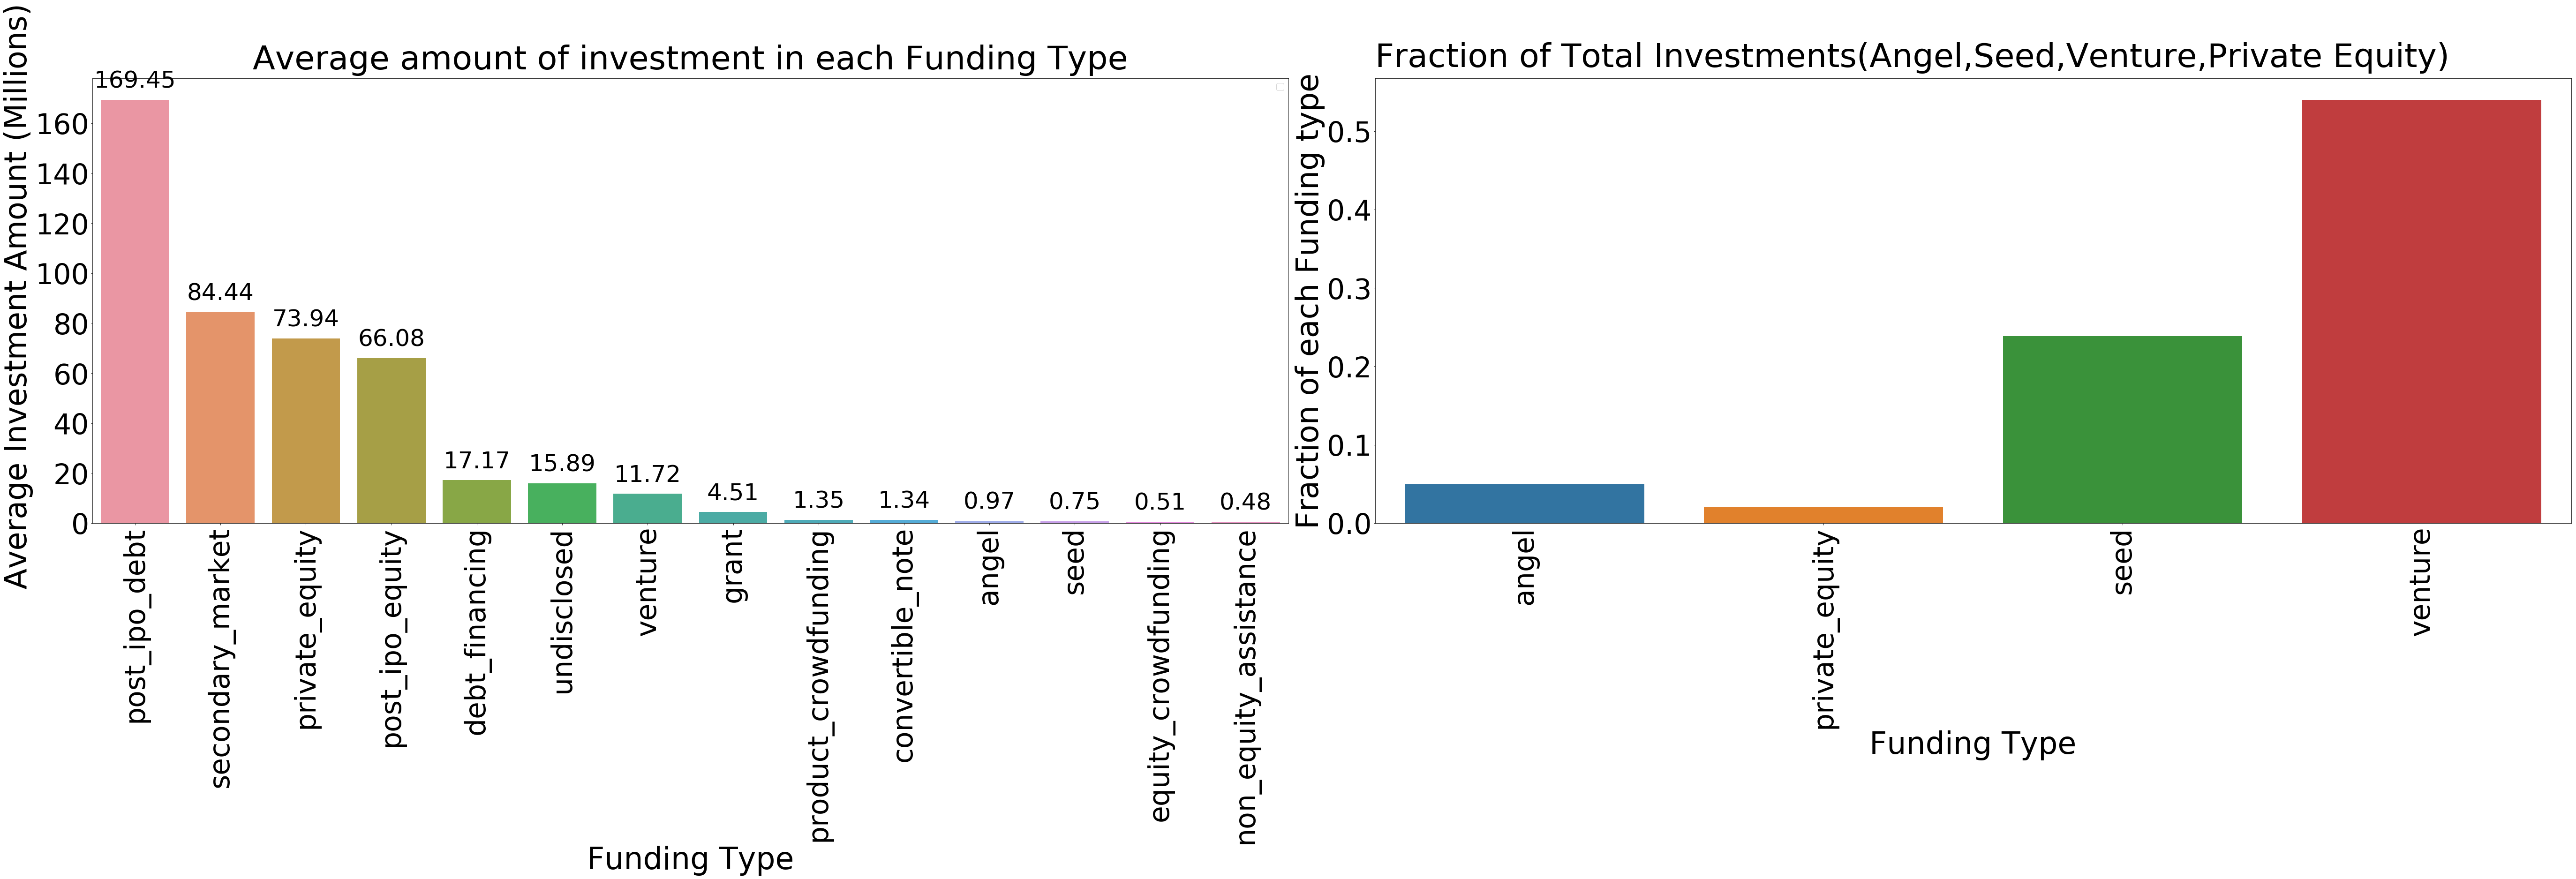

In [77]:
#Plot to show Average amount of investment in each Funding type and Fraction of  Total Investments in angel,venture,seed and private Equity
size = 50
plt.figure(figsize = (80,25))
#Average amount of investment in each funding type
plt.subplot(1, 2, 1)
plt.legend(labels=fund_type_grouped.funding_round_type,fontsize= 20)
ax = sns.barplot(x='funding_round_type',y='millions',data = fund_type_grouped)
plt.xlabel("Funding Type",fontsize = size+15)
plt.ylabel(" Average Investment Amount (Millions)",fontsize = size+15)
plt.xticks(fontsize=size+10, rotation=90)
plt.yticks(fontsize=size+10)
plt.title("Average amount of investment in each Funding Type",fontsize = size+20,pad = 20,loc = 'center')
rects = ax.patches
labels = fund_type_grouped["millions"]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label,
            ha='center', va='bottom',fontsize = size)
#Fraction of  Total Investments in angel,venture,seed and private Equity Globally
ax1 = plt.subplot(1,2,2)
plt.title("Fraction of Total Investments(Angel,Seed,Venture,Private Equity)",fontsize = size+20,pad = 25,loc = 'left')
#df.plot(kind = 'pie',y='Percentage',ax = ax1,autopct='%1.1f%%', 
#startangle=120, shadow=False,labels = df["funding_round_type"],legend=False,radius = 1.2,fontsize = size+10)
ax1 = sns.barplot(x='funding_round_type',y='Fraction',data = fund_type_count)
plt.xlabel("Funding Type",fontsize = size+15)
plt.ylabel("Fraction of each Funding type",fontsize = size+15)
plt.xticks(fontsize=size+10, rotation=90)
plt.yticks(fontsize=size+10)
plt.tight_layout()
plt.show()

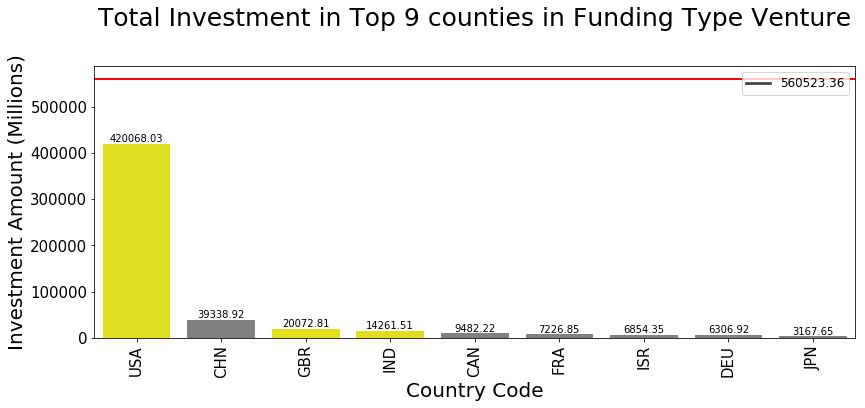

In [78]:
#Highlighted the top english speaking countries in yellow and red line denotes total amount of the funding type Venture
top9['millions'] = round(top9["raised_amount_usd"]/1000000,2)
top9["total_amount"] =round(((master_frame_ven["raised_amount_usd"].sum())/1000000),2)
size = 10
plt.figure(figsize = (30,5))
plt.subplot(1, 2, 1)
l = list(top_three["country_code"])
clrs = ['yellow' if x in l else 'grey' for x in top9["country_code"]]
ax = sns.barplot(x='country_code',y='millions',data = top9,palette=clrs)
plt.xlabel("Country Code",fontsize = size+10)
plt.ylabel("Investment Amount (Millions)",fontsize = size+10)
plt.xticks(fontsize=size+5, rotation=90)
plt.yticks(fontsize=size+5)
plt.title("Total Investment in Top 9 counties in Funding Type Venture",fontsize = size+15,pad = 40,loc = 'center')

rects = ax.patches
labels = top9["millions"]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label,
            ha='center', va='bottom',fontsize = size)
tt = list(top9.total_amount.unique())
label='Total_investment'+str(tt)
plt.axhline(y=tt, linewidth= 2, label = "Total",color='r',zorder=1)
plt.legend(labels=tt,fontsize= size+2,loc='upper right')
plt.show()

In [79]:
#Combining Top3 Sectors of data in top three countries
df_count =  c1_count.nlargest(3,"total_count")
df_count["country_code"] = top_three.iloc[0,0]
df1 = c3_count.nlargest(3,"total_count")
df1["country_code"] =top_three.iloc[2,0]
df2 = c2_count.nlargest(3,"total_count")
df2["country_code"] = top_three.iloc[1,0]
df_count = df_count.append(df2)
df_count = df_count.append(df1)
df_count

,category,total_count,country_code
6,Others,8314,USA
1,Cleantech / Semiconductors,7996,USA
7,"Social, Finance, Analytics, Advertising",7246,USA
6,Others,516,GBR
1,Cleantech / Semiconductors,442,GBR
7,"Social, Finance, Analytics, Advertising",421,GBR
6,Others,284,IND
7,"Social, Finance, Analytics, Advertising",147,IND
5,"News, Search and Messaging",130,IND


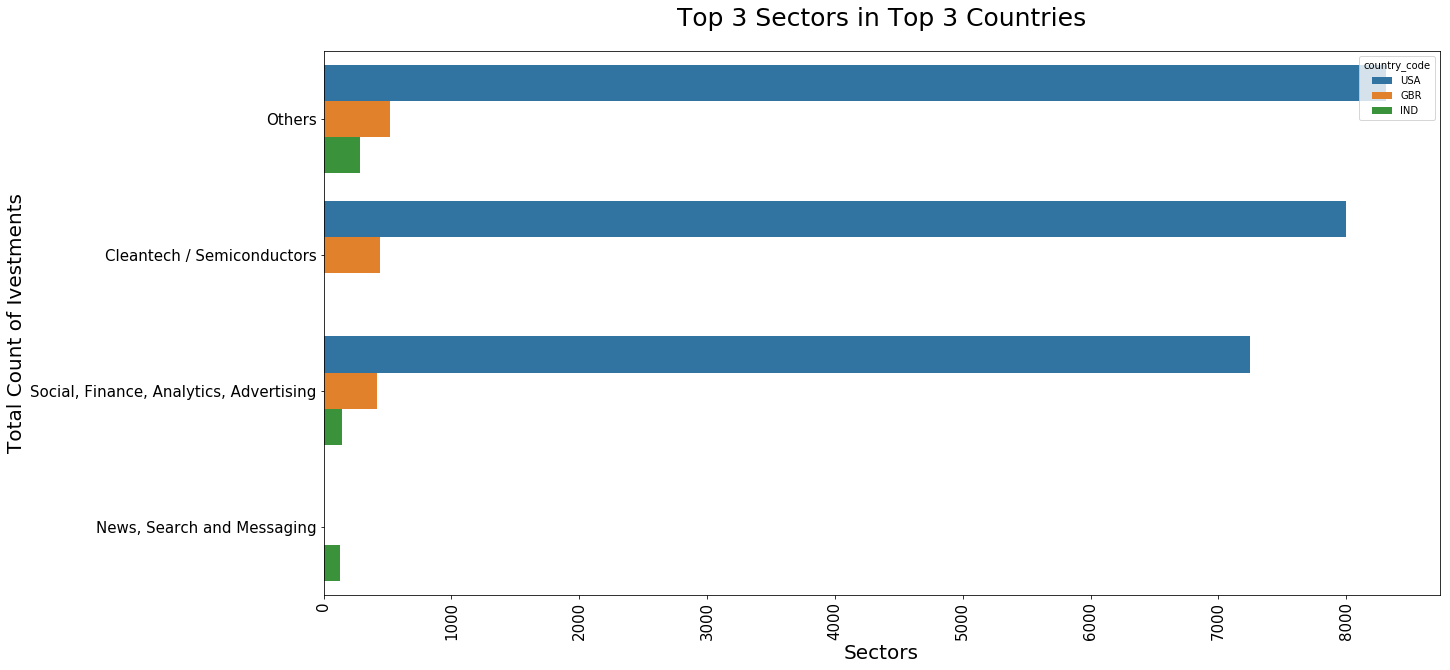

In [80]:
#Top3 Secotors in Top3 Countries
size = 10
width = 0.5
plt.figure(figsize = (20,10))
#plt.legend(labels=fund_type_grouped.funding_round_type,fontsize= 20)
ax = sns.barplot(x="total_count",y="category",hue ="country_code",data = df_count)
plt.xlabel("Sectors",fontsize = size+10)
plt.ylabel("Total Count of Ivestments",fontsize = size+10)
plt.xticks(fontsize=size+5,rotation = 90)
plt.yticks(fontsize=size+5)
plt.title("Top 3 Sectors in Top 3 Countries",fontsize = size+15,pad = 25,loc = 'center')
plt.show()